   Analyzing Investment Trends In The indian Startup Ecosystem Data-Driven Approach Using 'CRISP-DM'
   
   BUSINESS UNDERSTANDING 
   
 Objective
   Our team is exploring the indian startup ecosystem to have insights funding trends and establishes promising opportunities. The main objective of exploring the indian ecosystem is to analyze funding dataset from 2018 to 2021,by focusing on  the key factors, i.e the amount of funding received  sectors in the ecosystem, stages of investment and geographical locations.

   HYPOTHESIS TESTING
   Null Hypothesis(H0) There are no significant differences in the funding amount received by all the startups across different sectors and stages.
   
   
   Alternative Hypothesis (H1) There are significant differences in the funding amount received  by all the startups across different sectors and stages.


DATA UNDERSTANDING
COLUNMS
company_Brand: Name of the startup.
Founded: year the startup was founded.
HeadQuarter: City where the startup is headquartered.
Sector: INdustry sector of the startup.
What_it_does: Brief description of the startup's business.
Founders: Names of the Founders
Investors:  Investors or investment firms that funded the startup.
Amount: amount of funding received (in dollars).
Stage: stage of investment (i.e pre-seed, seed, series A).


ANALYTICAL QUESTIONS
1. How many startups are established in the indian ecosystem yearly?
2.How much amount was given to the top ten (10) sectors in the indian startup Ecosystem?
3.How was the top Five(5) stages that received the most funding perform in the indian startup Ecosystem.
4.Are they top investors in the indian startup and how much was provided by them?
5.How the locations that received the most funding perform,considered the top 10 locations

In [4]:
 %pip install pyodbc  
 %pip install python-dotenv 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')


In [6]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [7]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [8]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# load 2020 dataset

query = '''Select * 
from dbo.LP1_startup_funding2020'''

data_2020 = pd.read_sql(query, connection)
data_2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [11]:
# Load 2021 dataset

query = '''Select *
 from dbo.LP1_startup_funding2021'''

data_2021 = pd.read_sql(query, connection)

In [12]:
# load data from onedrive
data_2019 = pd.read_csv(r"C:\Users\\DELL\\Downloads\\PROJECT@AZUBI\\Lp1-Indian-startup-ecosystem\\Dataset//startup_funding2019.csv")
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [13]:
#load data from github repository
data_2018= pd.read_csv(r"C:\Users\\DELL\\Downloads\\PROJECT@AZUBI\\Lp1-Indian-startup-ecosystem\\Dataset//startup_funding2018.csv")
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


Review to see the shape of your datasets
The shape of the data would you understand the numbers of rows and columns in the datasets

In [14]:
data_2021.shape, data_2020.shape, data_2019.shape, data_2018.shape 

((1209, 9), (1055, 10), (89, 9), (526, 6))

THE BASIC INFORMATION ON ALL YOUR DATASETS
we deployed this methods to print out the information on your dataframe including all the columns, non-null values and dtypes of all the datasets 

In [15]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [16]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [17]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [18]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


FIND ALL THE DUPLICATES IN THE DATASETS

In [19]:
data_2021[data_2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [20]:
data_2020[data_2020.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [21]:
data_2019[data_2019.duplicated()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [22]:
data_2018[data_2018.duplicated()]

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


COMPUTE ALL THE DUPLICATED DATA
This function would you identify the rows that have been duplicated in the datasets

In [23]:
data_2021.duplicated().sum()

19

In [24]:
data_2020.duplicated().sum()


3

In [25]:
data_2019.duplicated().sum()

0

In [26]:
data_2018.duplicated().sum()

1

LET LOOK OUT FOR NULL VALUES IN THE DATASETS

In [27]:
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [28]:
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [29]:
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [30]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

OBSERVATIONS AFTER PREVIEWING ALL THE DATASETS

After Examing all the datasets,we conluded as follows.

1.Inconsistent column names: it was observed that the column names for and the data set were not consistent and therefore needed to be standardized.
2.Missing columns: The 2018 dataset was missing some columns
3. Duplicated rows: some rows in the dataset were duplicated
4.Missing values: all the datasets had some missing values in them
5. Inconsistent currencies: it was observed that some amount columns has different currencies in them.

DATA CLEANING

In this section, we iterate through our datasets and fix all the anomalies that were identified during the data preview.

For the 2018 datase:

1.convert all rupees in the amount column in to the dollar equivalent
2.drop all the dollar symbols in the dataset
3.replace all non numerical values with Nan values
4.fill all the Nan values with with the mode of the column

In [31]:
# filter out all values without dollar and rupee symbols

data_2018 = data_2018.loc[~data_2018['Amount'].str.isdigit()]

In [32]:
#check to see the result of the above code
with pd.option_context('display.max_rows', None,):
    print(data_2018['Amount'])

1          ₹40,000,000
2          ₹65,000,000
4                    —
6          ₹16,000,000
7          ₹50,000,000
8                    —
9                    —
10                   —
11                   —
12                   —
13                   —
14                   —
15        ₹100,000,000
18                   —
19            ₹500,000
22         ₹35,000,000
23         ₹64,000,000
24                   —
25                   —
29                   —
30         ₹20,000,000
32                   —
37         ₹30,000,000
40                   —
42         ₹40,000,000
45                   —
48                   —
49          ₹5,000,000
50         ₹20,000,000
51         ₹40,000,000
52         ₹20,000,000
54         ₹12,500,000
55         ₹15,000,000
58        ₹104,000,000
59         ₹45,000,000
61                   —
63                   —
64         ₹25,000,000
65                   —
66         ₹26,400,000
67                   —
68                   —
69          ₹8,000,000
70         

In [33]:
#At the time of performing this analysis, a dollar to a rupee was 83.32

exchange_rate = 83.32

# write a function to convert rupees to USD
def convert_to_usd(amount):
    if '₹' in amount:
        rupee_value = float(amount.replace('₹', '').replace(',', ''))
        usd_value = rupee_value / exchange_rate
        return f'{round(usd_value)}'
    elif '$' in amount:
        usd_value = float(amount.replace('$', '').replace(',', ''))
        return f'{round(usd_value)}'
    else:
        return amount

# Apply the conversion function to the 'Amount' column
data_2018['Amount'] = data_2018['Amount'].apply(convert_to_usd)

In [34]:
# Apply the conversion function to the 'Amount' column
data_2018['Amount'] = data_2018['Amount'].apply(convert_to_usd)


In [35]:
#check to see the result of the above code
with pd.option_context('display.max_rows', None,):
    print(data_2018['Amount'])

1          480077
2          780125
4               —
6          192031
7          600096
8               —
9               —
10              —
11              —
12              —
13              —
14              —
15        1200192
18              —
19           6001
22         420067
23         768123
24              —
25              —
29              —
30         240038
32              —
37         360058
40              —
42         480077
45              —
48              —
49          60010
50         240038
51         480077
52         240038
54         150024
55         180029
58        1248200
59         540086
61              —
63              —
64         300048
65              —
66         316851
67              —
68              —
69          96015
70            720
73              —
76              —
78              —
81              —
83         408065
84              —
85        4104657
86         143145
87              —
88        7201152
89              —
90      74

In [36]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480077,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780125,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,192031,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,600096,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...


In [37]:
#convert the amount column to numeric

data_2018['Amount'] = pd.to_numeric(data_2018['Amount'], errors= 'coerce')

In [38]:
#check to see the result of the above code
with pd.option_context('display.max_rows', None,):
    print(data_2018['Amount'])

1      4.800770e+05
2      7.801250e+05
4               NaN
6      1.920310e+05
7      6.000960e+05
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15     1.200192e+06
18              NaN
19     6.001000e+03
22     4.200670e+05
23     7.681230e+05
24              NaN
25              NaN
29              NaN
30     2.400380e+05
32              NaN
37     3.600580e+05
40              NaN
42     4.800770e+05
45              NaN
48              NaN
49     6.001000e+04
50     2.400380e+05
51     4.800770e+05
52     2.400380e+05
54     1.500240e+05
55     1.800290e+05
58     1.248200e+06
59     5.400860e+05
61              NaN
63              NaN
64     3.000480e+05
65              NaN
66     3.168510e+05
67              NaN
68              NaN
69     9.601500e+04
70     7.200000e+02
73              NaN
76              NaN
78              NaN
81              NaN
83     4.080650e+05
84              NaN


In [39]:
# Round the 'Amount' column to a whole number
data_2018['Amount'] = data_2018['Amount'].round(0)

# Display the rounded 'Amount' column
with pd.option_context('display.float_format', lambda x: f'{x:.0f}'):
    display(data_2018['Amount'])

1       480077
2       780125
4          NaN
6       192031
7       600096
        ...   
516   16802688
517     120019
518        NaN
522        NaN
524     420067
Name: Amount, Length: 351, dtype: float64

In [40]:
#impute missing values with the mode of the column
mode_2018= data_2018['Amount'].mode()[0]
data_2018['Amount'].fillna(mode_2018, inplace= True)
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480077.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780125.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,600096.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,192031.0,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,600096.0,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...


REMOVE ALL DOLLAR SYMBOLS IN THE 2019 AND 2021 DATASET

In [41]:
data_2019['Amount($)']=data_2019['Amount($)'].str.replace('$', '').replace(',', '')
data_2021['Amount']=data_2021['Amount'].str.replace('$', '').replace(',', '')

SEE THE RESULTS OF THE ABOVE CODES

In [42]:
with pd.option_context('display.max_rows', None,):
    print(data_2019['Amount($)'])

0       6,300,000
1     150,000,000
2      28,000,000
3      30,000,000
4       6,000,000
5     Undisclosed
6     Undisclosed
7       1,000,000
8      20,000,000
9     275,000,000
10    Undisclosed
11     22,000,000
12      5,000,000
13        140,500
14    Undisclosed
15      5,000,000
16    540,000,000
17     15,000,000
18        182,700
19    Undisclosed
20      5,000,000
21     12,000,000
22     11,000,000
23    Undisclosed
24     15,500,000
25      1,500,000
26      5,500,000
27      5,000,000
28     12,000,000
29      2,500,000
30     30,000,000
31        140,000
32    Undisclosed
33    230,000,000
34     20,000,000
35     49,400,000
36     32,000,000
37     26,000,000
38        150,000
39        400,000
40      2,000,000
41    100,000,000
42      8,000,000
43      1,500,000
44        100,000
45    Undisclosed
46     50,000,000
47      6,000,000
48    120,000,000
49      4,000,000
50     30,000,000
51      4,000,000
52      1,500,000
53      1,000,000
54    Undisclosed
55    Undi

REMOVE ALL COMMAS, REPLACE 'UNDISCLOSED' WITH np.NAN AND CONVERT COLUMNS OF 2019 AND 2021 AMOUNT COLUMNS TO NUMERIICAL DATA

In [43]:
data_2019['Amount($)'] = data_2019['Amount($)'].replace(',', '', regex=True)
data_2019['Amount($)'] = data_2019['Amount($)'].replace('Undisclosed', np.nan)
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce')

In [44]:
data_2021['Amount'] = data_2021['Amount'].replace(',', '', regex=True)
data_2021['Amount'] = data_2021['Amount'].replace('Undisclosed', np.nan)
data_2021['Amount'] = pd.to_numeric(data_2021['Amount'], errors='coerce')

CHECK THE RESULTS OF THE CODES ABOVE

In [45]:
with pd.option_context('display.max_rows', None,):
    print(data_2019['Amount($)'])

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
5             NaN
6             NaN
7       1000000.0
8      20000000.0
9     275000000.0
10            NaN
11     22000000.0
12      5000000.0
13       140500.0
14            NaN
15      5000000.0
16    540000000.0
17     15000000.0
18       182700.0
19            NaN
20      5000000.0
21     12000000.0
22     11000000.0
23            NaN
24     15500000.0
25      1500000.0
26      5500000.0
27      5000000.0
28     12000000.0
29      2500000.0
30     30000000.0
31       140000.0
32            NaN
33    230000000.0
34     20000000.0
35     49400000.0
36     32000000.0
37     26000000.0
38       150000.0
39       400000.0
40      2000000.0
41    100000000.0
42      8000000.0
43      1500000.0
44       100000.0
45            NaN
46     50000000.0
47      6000000.0
48    120000000.0
49      4000000.0
50     30000000.0
51      4000000.0
52      1500000.0
53      1000000.0
54            NaN
55        

In [46]:
with pd.option_context('display.max_rows', None,):
    print(data_2021['Amount'])

0       1.200000e+06
1       1.200000e+08
2       3.000000e+07
3       5.100000e+07
4       2.000000e+06
5       1.880000e+08
6       2.000000e+05
7                NaN
8                NaN
9       1.000000e+06
10      3.000000e+06
11      1.000000e+05
12      7.000000e+05
13      2.000000e+06
14      9.000000e+06
15      4.000000e+07
16      4.900000e+07
17      4.000000e+05
18      3.000000e+05
19      2.500000e+07
20      1.600000e+08
21               NaN
22      1.500000e+05
23      1.800000e+06
24      5.000000e+06
25      8.500000e+05
26      3.000000e+06
27      5.300000e+07
28      2.000000e+06
29      5.000000e+05
30      1.100000e+06
31      6.000000e+06
32      8.000000e+05
33      5.000000e+05
34      1.000000e+06
35      1.000000e+07
36      5.000000e+05
37      2.000000e+05
38      6.000000e+06
39               NaN
40      2.100000e+07
41      1.000000e+05
42      1.000000e+06
43      7.500000e+06
44      1.000000e+05
45      1.000000e+06
46      2.600000e+07
47      1.000

In [47]:
# Round the 'Amount' column to a whole number
data_2021['Amount'] = data_2021['Amount'].round(0)

# Display the rounded 'Amount' column
with pd.option_context('display.float_format', lambda x: f'{x:.0f}'):
    display(data_2021['Amount'])

0        1200000
1      120000000
2       30000000
3       51000000
4        2000000
          ...   
1204     3000000
1205    20000000
1206    55000000
1207    26000000
1208     8000000
Name: Amount, Length: 1209, dtype: float64

IMPUTATION OF MISSING VALUES IN THE AMOUNT COLUMNS OF THE 2019, 2020,2021 DATASETS

In [48]:
#calculate the mode of the amount column and fill the Nan values with it

mode_2021= data_2021['Amount'].mode()[0]
data_2021['Amount'].fillna(mode_2021, inplace=True)

mode_2020= data_2020['Amount'].mode()[0]
data_2020['Amount'].fillna(mode_2020, inplace=True)

mode_2019= data_2019['Amount($)'].mode()[0]
data_2019['Amount($)'].fillna(0, inplace=True)
# Display the rounded 'Amount' column
with pd.option_context('display.float_format', lambda x: f'{x:.0f}'):
    display(data_2021['Amount'])

0        1200000
1      120000000
2       30000000
3       51000000
4        2000000
          ...   
1204     3000000
1205    20000000
1206    55000000
1207    26000000
1208     8000000
Name: Amount, Length: 1209, dtype: float64

In [49]:
# Display the rounded 'Amount' column
with pd.option_context('display.float_format', lambda x: f'{x:.0f}'):
    display(data_2020['Amount'])

0        200000
1        100000
2       1000000
3        400000
4        340000
         ...   
1050    1500000
1051   13200000
1052    8000000
1053    8043000
1054    9000000
Name: Amount, Length: 1055, dtype: float64

In [50]:
# Display the rounded 'Amount' column
with pd.option_context('display.float_format', lambda x: f'{x:.0f}'):
    display(data_2019['Amount($)'])

0      6300000
1    150000000
2     28000000
3     30000000
4      6000000
        ...   
84    20000000
85   693000000
86     5000000
87    50000000
88    33000000
Name: Amount($), Length: 89, dtype: float64

AT THIS POINT WE ADDED THE YEAR COLUMN IN ALL THE DATASETS

The year column serves as unique identifier when all the datasets are merged togther.

In [51]:
data_2018['Year']= 2018
data_2019['Year']= 2019
data_2020['Year']= 2020
data_2021['Year']= 2021

 NOW WE DROP ALL COLUMNS THAT WILL NOT BE NEEDED FOR THE ANALYSIS

In [52]:
data_2019.drop(columns=['Founded','Founders'],inplace=True )
data_2020.drop(columns=['Founded','Founders','column10'], inplace=True)
data_2021.drop(columns=['Founded','Founders'],inplace=True )

WE ALSO RENAME COLUMNS IN THE 2018 DATASET

The column names of the various datasets are not the same and therefore there is the need to standardise all the columns

In [53]:
data_2018= data_2018.rename(columns={'Company Name': 'Company/Brand','Location':'HeadQuarter', 'Industry':'Sector','About Company':'What it does','Amount':'Amount($)', 'Round/Series': 'Stage'})
data_2018.head(1)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480077.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018


ADD AN INVESTOR COLUMN AND NAME IT 'UNAVAILABLE'

In [54]:
data_2018['Investor'] = 'Unavailable'

In [55]:
reorder= [
'Company/Brand','HeadQuarter','Sector','What it does','Investor','Amount($)','Stage','Year']
data_2018=data_2018[reorder]

RENAME SOME COLUMNS IN THE 2020 AND 2021 DATSETS

In [56]:
#rename some columns in the 2021 dataset
data_2021=data_2021.rename(columns={'Company_Brand': 'Company/Brand','What_it_does':'What it does', 'Amount':'Amount($)'})


In [57]:
#rename some columns in the 2020 dataset
data_2020=data_2020.rename(columns={'Company_Brand': 'Company/Brand','What_it_does':'What it does', 'Amount':'Amount($)'})


MERGED ALL THE DATASET FOR FUTHER CLEANING AND ANALYSIS

In [58]:
merged_data= pd.concat([data_2018,data_2019,data_2020, data_2021])
merged_data

,Company/Brand,HeadQuarter,Sector,What it does,Investor,Amount($),Stage,Year
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,Unavailable,480077.0,Seed,2018
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,Unavailable,780125.0,Series A,2018
4,Eunimart,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,Unavailable,600096.0,Seed,2018
6,Tripshelf,"Kalkaji, Delhi, India","Internet, Leisure, Marketplace",Tripshelf is an online market place for holida...,Unavailable,192031.0,Seed,2018
7,Hyperdata.IO,"Hyderabad, Andhra Pradesh, India",Market Research,Hyperdata combines advanced machine learning w...,Unavailable,600096.0,Angel,2018
...,...,...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...","Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


REVIEW THE MERGED DATASETS

In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, 1 to 1208
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2704 non-null   object 
 1   HeadQuarter    2590 non-null   object 
 2   Sector         2686 non-null   object 
 3   What it does   2704 non-null   object 
 4   Investor       2604 non-null   object 
 5   Amount($)      2704 non-null   float64
 6   Stage          1766 non-null   object 
 7   Year           2704 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 190.1+ KB


In [60]:
#check for null values in the dataset
merged_data.isnull().sum()

Company/Brand      0
HeadQuarter      114
Sector            18
What it does       0
Investor         100
Amount($)          0
Stage            938
Year               0
dtype: int64

LET US NOW BEGIN TO DO MORE DATA CLEANING WITH MERGED DATA 

WE THEN CONVERTED YEAR COLUMN TO DATETIME 

In [61]:
merged_data['Year']=pd.to_datetime(merged_data['Year'], format='%Y')


#view the data type of the year column
merged_data['Year'].dtypes

dtype('<M8[ns]')

Reindexing the dataframe will reset the indexes from 0 to the last number



In [62]:
merged_data=merged_data.reset_index(drop=True)

LOOKING AT COLUMN BY COLUMN TO CHECK AND FIX ALL ANOMALIES  OBSERVED


COMPANY/BRAND COLUMN
There are no anomalies in this column

In [63]:
with pd.option_context('display.max_rows', None,):
    print(merged_data['Company/Brand'])

0                                         Happy Cow Dairy
1                                              MyLoanCare
2                                                Eunimart
3                                               Tripshelf
4                                            Hyperdata.IO
5                                            Freightwalla
6                                      Microchip Payments
7                              BizCrum Infotech Pvt. Ltd.
8                                                 Emojifi
9                                                   Flock
10                                              Freshboxx
11                             Wide Mobility Mechatronics
12                                                Pitstop
13                                               AppWharf
14                       Antariksh Waste Ventures Pvt ltd
15                                      Sleepy Owl Coffee
16                                               BlueJack
17            

HEADQUATER OBSERVATIONS

1.Some cities were wrongly spelt
2.some rows contains both the city and contry names and therefore needs to be corrected

In [64]:
with pd.option_context('display.max_rows', None,):
    print(merged_data['HeadQuarter'])

0                              Mumbai, Maharashtra, India
1                                 Gurgaon, Haryana, India
2                        Hyderabad, Andhra Pradesh, India
3                                   Kalkaji, Delhi, India
4                        Hyderabad, Andhra Pradesh, India
5                              Mumbai, Maharashtra, India
6                             Bangalore, Karnataka, India
7                                     Delhi, Delhi, India
8                             Bengaluru, Karnataka, India
9                                             India, Asia
10                                Hubli, Karnataka, India
11                            Bangalore, Karnataka, India
12                            Bengaluru, Karnataka, India
13                                New Delhi, Delhi, India
14                             Chennai, Tamil Nadu, India
15                                New Delhi, Delhi, India
16                                    Delhi, Delhi, India
17            

In [65]:
#Extract only the city from rows that contain cities, province and country

merged_data['HeadQuarter']=merged_data['HeadQuarter'].str.split(',').str[0]
# Display results of the above code

with pd.option_context('display.max_rows', None,):
    print(merged_data['HeadQuarter'])

0                                  Mumbai
1                                 Gurgaon
2                               Hyderabad
3                                 Kalkaji
4                               Hyderabad
5                                  Mumbai
6                               Bangalore
7                                   Delhi
8                               Bengaluru
9                                   India
10                                  Hubli
11                              Bangalore
12                              Bengaluru
13                              New Delhi
14                                Chennai
15                              New Delhi
16                                  Delhi
17                              Bengaluru
18                                 Mohali
19                              Hyderabad
20                              New Delhi
21                              Bangalore
22                              New Delhi
23                              Ne

In [66]:
#replace cities with the wrong spellings with the right one
merged_data['HeadQuarter']= merged_data['HeadQuarter'].replace({'New Delhi':'Delhi', 'Bangalore City':'Bangalore','Gurugram\t#REF!':'Gurugram'  })
merged_data['HeadQuarter'].unique()

array(['Mumbai', 'Gurgaon', 'Hyderabad', 'Kalkaji', 'Bangalore', 'Delhi',
       'Bengaluru', 'India', 'Hubli', 'Chennai', 'Mohali', 'Pune',
       'Jodhpur', 'Kanpur', 'Kolkata', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Noida', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Trivandrum', 'Ernakulam', 'Uttar Pradesh', 'Kochi', 'Powai',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Chandigarh',
       'Kormangala', 'Lucknow', 'Ghaziabad', nan, 'Telangana', 'Gurugram',
       'Surat', 'Uttar pradesh', 'Rajasthan', 'Andheri', 'Tirunelveli',
       None, 'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area', 'Bangaldesh',
       'London', 'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine',
       'Tumkur', 'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing', 'Rajastan',
    

In [67]:
# Display results of the above code

with pd.option_context('display.max_rows', None,):
    print(merged_data['HeadQuarter'])

0                                  Mumbai
1                                 Gurgaon
2                               Hyderabad
3                                 Kalkaji
4                               Hyderabad
5                                  Mumbai
6                               Bangalore
7                                   Delhi
8                               Bengaluru
9                                   India
10                                  Hubli
11                              Bangalore
12                              Bengaluru
13                                  Delhi
14                                Chennai
15                                  Delhi
16                                  Delhi
17                              Bengaluru
18                                 Mohali
19                              Hyderabad
20                                  Delhi
21                              Bangalore
22                                  Delhi
23                                

In [68]:
# replace all non cities with an empty string

merged_data['HeadQuarter']= merged_data['HeadQuarter'].replace({'Computer Games':'','Food & Beverages':'','Pharmaceuticals\t#REF!':'','Online Media\t#REF!':'','Information Technology & Services':'','India':'','San Francisco bay area':'' })
# Display results of the above code

with pd.option_context('display.max_rows', None,):
    print(merged_data['HeadQuarter'])


0                       Mumbai
1                      Gurgaon
2                    Hyderabad
3                      Kalkaji
4                    Hyderabad
5                       Mumbai
6                    Bangalore
7                        Delhi
8                    Bengaluru
9                             
10                       Hubli
11                   Bangalore
12                   Bengaluru
13                       Delhi
14                     Chennai
15                       Delhi
16                       Delhi
17                   Bengaluru
18                      Mohali
19                   Hyderabad
20                       Delhi
21                   Bangalore
22                       Delhi
23                       Delhi
24                            
25                       Delhi
26                        Pune
27                     Jodhpur
28                     Chennai
29                      Kanpur
30                   Bengaluru
31                       Delhi
32      

In [69]:
#replace Bangalore with Bengaluru
merged_data['HeadQuarter'].replace('Bangalore','Bengaluru', inplace=True)

# Display results of the above code
with pd.option_context('display.max_rows', None,):
    print(merged_data['HeadQuarter'])

0                       Mumbai
1                      Gurgaon
2                    Hyderabad
3                      Kalkaji
4                    Hyderabad
5                       Mumbai
6                    Bengaluru
7                        Delhi
8                    Bengaluru
9                             
10                       Hubli
11                   Bengaluru
12                   Bengaluru
13                       Delhi
14                     Chennai
15                       Delhi
16                       Delhi
17                   Bengaluru
18                      Mohali
19                   Hyderabad
20                       Delhi
21                   Bengaluru
22                       Delhi
23                       Delhi
24                            
25                       Delhi
26                        Pune
27                     Jodhpur
28                     Chennai
29                      Kanpur
30                   Bengaluru
31                       Delhi
32      

FILL THE NAN VALUES WITH THE MODE OF THE HEADQUATER COLUMN

In [70]:
#find the mode the Headquater column and replace with NAN values and empty strings
mode= merged_data['HeadQuarter'].mode()[0]
#fill empty strings and Nan values with the mode
merged_data['HeadQuarter'].fillna(mode, inplace=True)
merged_data['HeadQuarter']=merged_data['HeadQuarter'].replace('', mode)
# Display results of the above code
with pd.option_context('display.max_rows', None,):
    print(merged_data['HeadQuarter'])

0                       Mumbai
1                      Gurgaon
2                    Hyderabad
3                      Kalkaji
4                    Hyderabad
5                       Mumbai
6                    Bengaluru
7                        Delhi
8                    Bengaluru
9                    Bengaluru
10                       Hubli
11                   Bengaluru
12                   Bengaluru
13                       Delhi
14                     Chennai
15                       Delhi
16                       Delhi
17                   Bengaluru
18                      Mohali
19                   Hyderabad
20                       Delhi
21                   Bengaluru
22                       Delhi
23                       Delhi
24                   Bengaluru
25                       Delhi
26                        Pune
27                     Jodhpur
28                     Chennai
29                      Kanpur
30                   Bengaluru
31                       Delhi
32      

CHECKING THE ANOMALIES IN THE SECTOR COLUMN

In [71]:
with pd.option_context('display.max_rows', None,):
    print(merged_data['Sector'])

0                                    Agriculture, Farming
1        Credit, Financial Services, Lending, Marketplace
2                      E-Commerce Platforms, Retail, SaaS
3                          Internet, Leisure, Marketplace
4                                         Market Research
5            Information Services, Information Technology
6                                         Mobile Payments
7                                              B2B, Shoes
8                                                Internet
9       Apps, Collaboration, Developer Platform, Enter...
10                                          Food Delivery
11                                  Industrial Automation
12            Automotive, Search Engine, Service Industry
13      Artificial Intelligence, Product Search, SaaS,...
14                   Internet of Things, Waste Management
15                                      Food and Beverage
16                                    Autonomous Vehicles
17      Enterp

OBSERVATIONS

1.Sector column has some characters(-) in them
2.No uniformity in the with the spelling Edtech

In [72]:
#replace - with nan
merged_data['Sector']=merged_data['Sector'].replace({'—':'Nan'})
with pd.option_context('display.max_rows', None,):
    print(merged_data['Sector'])

0                                    Agriculture, Farming
1        Credit, Financial Services, Lending, Marketplace
2                      E-Commerce Platforms, Retail, SaaS
3                          Internet, Leisure, Marketplace
4                                         Market Research
5            Information Services, Information Technology
6                                         Mobile Payments
7                                              B2B, Shoes
8                                                Internet
9       Apps, Collaboration, Developer Platform, Enter...
10                                          Food Delivery
11                                  Industrial Automation
12            Automotive, Search Engine, Service Industry
13      Artificial Intelligence, Product Search, SaaS,...
14                   Internet of Things, Waste Management
15                                      Food and Beverage
16                                    Autonomous Vehicles
17      Enterp

In [73]:
with pd.option_context('display.max_rows', None,):
    print(merged_data['Sector'])
    #Display results of the above code
with pd.option_context('display.max_rows', None,):
    print(merged_data['Sector'])

0                                    Agriculture, Farming
1        Credit, Financial Services, Lending, Marketplace
2                      E-Commerce Platforms, Retail, SaaS
3                          Internet, Leisure, Marketplace
4                                         Market Research
5            Information Services, Information Technology
6                                         Mobile Payments
7                                              B2B, Shoes
8                                                Internet
9       Apps, Collaboration, Developer Platform, Enter...
10                                          Food Delivery
11                                  Industrial Automation
12            Automotive, Search Engine, Service Industry
13      Artificial Intelligence, Product Search, SaaS,...
14                   Internet of Things, Waste Management
15                                      Food and Beverage
16                                    Autonomous Vehicles
17      Enterp

In [74]:
#replace Fintech with FinTech
merged_data['Sector']=merged_data['Sector'].replace({'Fintech':'FinTech'})
#Display results of the above code
with pd.option_context('display.max_rows', None,):
    print(merged_data['Sector'])

0                                    Agriculture, Farming
1        Credit, Financial Services, Lending, Marketplace
2                      E-Commerce Platforms, Retail, SaaS
3                          Internet, Leisure, Marketplace
4                                         Market Research
5            Information Services, Information Technology
6                                         Mobile Payments
7                                              B2B, Shoes
8                                                Internet
9       Apps, Collaboration, Developer Platform, Enter...
10                                          Food Delivery
11                                  Industrial Automation
12            Automotive, Search Engine, Service Industry
13      Artificial Intelligence, Product Search, SaaS,...
14                   Internet of Things, Waste Management
15                                      Food and Beverage
16                                    Autonomous Vehicles
17      Enterp

CHECKING FOR ANOMALIES IN THE What It Does column

In [75]:
with pd.option_context('display.max_rows', None,):
    print(merged_data['What it does'])

0       A startup which aggregates milk from dairy far...
1               Leading Online Loans Marketplace in India
2       Eunimart is a one stop solution for merchants ...
3       Tripshelf is an online market place for holida...
4       Hyperdata combines advanced machine learning w...
5       Freightwalla is an international forwarder tha...
6       Microchip payments is a mobile-based payment a...
7                Building Transactionary B2B Marketplaces
8       Emojifi is an app that provides live emoji, st...
9       Flock is a real-time messaging and collaborati...
10      Freshboxx is incubated at Sandbox Startups, a ...
11      Wide Mobility Mechatronics is a Private Compan...
12      Pitstop offers general repair and maintenance ...
13      Appwharf is an intelligent assistant that help...
14                      Waste Management for Smart Cities
15      Makers of a signature coffee that's exceptiona...
16          Delhi-based online used vehicles marketplace.
17      PregBu

OUR OBSERVATION INDICATED THAT THERE ARE NO ANOMALIES WITH THIS COLUMN

CHECK FOR ANOMALITIES IN THE INVESTOR COLUMN

In [76]:
with pd.option_context('display.max_rows', None,):
    print(merged_data['Investor'])


0                                             Unavailable
1                                             Unavailable
2                                             Unavailable
3                                             Unavailable
4                                             Unavailable
5                                             Unavailable
6                                             Unavailable
7                                             Unavailable
8                                             Unavailable
9                                             Unavailable
10                                            Unavailable
11                                            Unavailable
12                                            Unavailable
13                                            Unavailable
14                                            Unavailable
15                                            Unavailable
16                                            Unavailable
17            

OBSERVATION Some row in the column contains None values that needs to be replaced with the mode of the column

In [77]:
#replace all None values with 'Unavailable'
merged_data['Investor'].fillna('Unavailable',inplace=True)
with pd.option_context('display.max_rows', None,):
    print(merged_data['Investor'])

0                                             Unavailable
1                                             Unavailable
2                                             Unavailable
3                                             Unavailable
4                                             Unavailable
5                                             Unavailable
6                                             Unavailable
7                                             Unavailable
8                                             Unavailable
9                                             Unavailable
10                                            Unavailable
11                                            Unavailable
12                                            Unavailable
13                                            Unavailable
14                                            Unavailable
15                                            Unavailable
16                                            Unavailable
17            

CHECKING FOR ANOMALIES IN THE STAGE COLUMN



In [78]:
with pd.option_context('display.max_rows', None,):
    print(merged_data['Stage'])

0                           Seed
1                       Series A
2                           Seed
3                           Seed
4                          Angel
5                           Seed
6                           Seed
7                           Seed
8                           Seed
9                           Seed
10                          Seed
11                          Seed
12                          Seed
13                          Seed
14                          Seed
15                          Seed
16                          Seed
17                          Seed
18                      Series A
19                         Angel
20                          Seed
21                          Seed
22                          Seed
23                          Seed
24                          Seed
25                          Seed
26                          Seed
27                          Seed
28                          Seed
29                          Seed
30        

OBSERVATION There are numerical values in the stage column that needs to be removed

In [79]:
merged_data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       None, 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Series D1', 'Mid series',
       'Series C, D', '$1200000', 'Seed+', 'Series F2', 'Series

In [80]:
#REMOVE THE DOLLAR SYMBOL FROM THE NUMERICAL VALUE IN THE STAGE COLUMN

merged_data['Stage']=merged_data['Stage'].str.replace('$','')
#remove numerical values from the column 
merged_data['Stage']=merged_data['Stage'].replace({'300000':'nan', '6000000':'nan', '1000000':'nan','1200000':'nan'})
#find the mode the stage column and replace with NAN values and empty strings
mode= merged_data['Stage'].mode()[0]
#fill empty strings and Nan values with the mode
merged_data['Stage'].fillna(mode, inplace=True)
#Display results of the above code
with pd.option_context('display.max_rows', None,):
    print(merged_data['Stage'])

0                           Seed
1                       Series A
2                           Seed
3                           Seed
4                          Angel
5                           Seed
6                           Seed
7                           Seed
8                           Seed
9                           Seed
10                          Seed
11                          Seed
12                          Seed
13                          Seed
14                          Seed
15                          Seed
16                          Seed
17                          Seed
18                      Series A
19                         Angel
20                          Seed
21                          Seed
22                          Seed
23                          Seed
24                          Seed
25                          Seed
26                          Seed
27                          Seed
28                          Seed
29                          Seed
30        

In [81]:
#Display the results for the above code
merged_data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D', 'nan',
       'Seed+', 'Series F2', 'Series A+', 'Series B3

ANALYTICAL QUESTION

QUESTION 1 
HOW MANY STARTUPS ARE ESTABLISED IN THE INDIAN ECOSYSTEM YEARLY?

Year
2018-01-01     351
2019-01-01      87
2020-01-01     905
2021-01-01    1033
Name: Company/Brand, dtype: int64


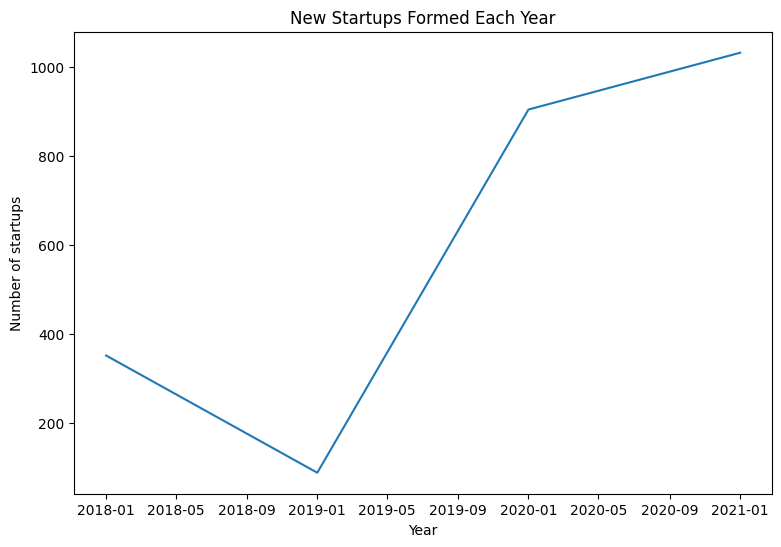

In [113]:
#Group data by Year  and company brand 
startups_by_year= merged_data.groupby('Year')['Company/Brand'].nunique()
#print results
print(startups_by_year)
#plot the number of startups in each year
plt.figure(figsize=(9,6))
plt.plot(startups_by_year.index, startups_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of startups')
plt.title('New Startups Formed Each Year')
plt.show()


OBSERVATIONS AND RECOMENDATIONS
The visualisation above clearly indicated that,there has been an increament of startups in the indian ecosystem from 2018 that recorded 351 new startups that was formed and there was a decline in the startups in 2019 that recorded 87 startups in the indian ecosystem indicating the low startups as compared to 2018. Meanwhile  we also noted that the preceeding years had an increase or tremendous inprovement in the startups that was formed in the indian ecosystem. 

QUESTION 2
HOW MUCH AMOUNT WAS GIVEN TO THE TOP TEN (10) SECTORS IN THE INDIAN STARTUP ECOSYSTEM?

                                 Sector           Amount($)
364                             FinTech $154,800,978,900.00
637                              Retail  $70,543,980,096.00
310                              EdTech   $3,662,290,000.00
695                        Tech company   $3,024,700,000.00
299                          E-commerce   $2,885,052,000.00
580  Multinational conglomerate company   $2,200,000,000.00
319                              Edtech   $2,171,624,730.00
86                           Automotive   $2,117,320,259.00
373                  Financial Services   $1,759,087,782.00
466                         Hospitality   $1,624,890,010.00


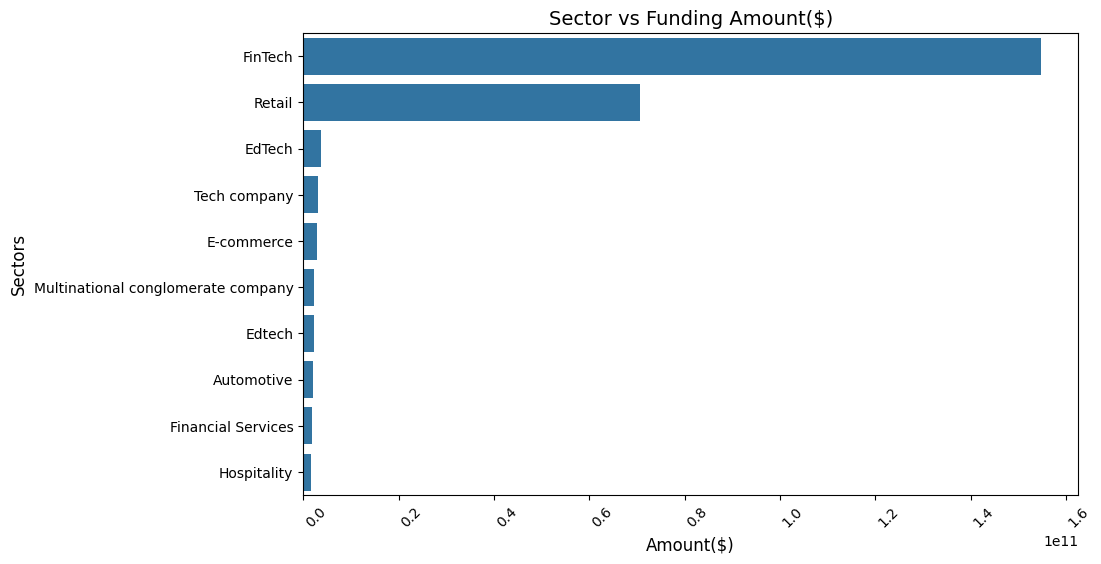

In [114]:
#Group data by Sector  and amount 
Top_sectors= merged_data.groupby('Sector')['Amount($)'].sum().reset_index()
#sort data in ascending order
Top_sectors= Top_sectors.sort_values('Amount($)', ascending=False)

# Convert the 'Amount($)' column to standard numeric format
pd.options.display.float_format = '${:,.2f}'.format
#Print the top 10 results of the above cod
print(Top_sectors.head(10))
# create barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Amount($)", y="Sector", data=Top_sectors.head(10))

# set plot title and axis labels
plt.title("Sector vs Funding Amount($)", fontsize=14)
plt.xlabel("Amount($)", fontsize=12)
plt.ylabel("Sectors", fontsize=12)
plt.xticks(rotation=45, ha='left')

# show the plot
plt.show()

OBSERVATIONS
The chart above clearly shows that, the industries experiencing substantial investment, with Fintech leading the way and securing an incredible funding of 1.55 trillion. On the other end of the chart,  can also be identified that, Financial services, Hospitality and Automotive industries received the less funding in the indian startup ecosystem with reference to the chart above.
RECOMENDATIONS
 Business Owners in search of funding for their businesses can utilize this important data to search sectors drawing substantial investments.These investment patterns, can strategically position business owners to be successful in the market space. As exhibited by Fintech's prominence,  which has the potential to open up a lot of avenues for growing  an innovative, business success toward a greater prosperity in future.

QUESTION 3
HOW WAS THE TOP FIVE(5) STAGES THAT RECEIVED THE MOST FUNDING PERFORM IN THE INDIAN STARTUP ECOSYSTEM.

       Stage           Amount($)
5       Debt $150,587,432,000.00
35      Seed $101,367,378,628.00
54  Series C   $4,851,283,656.00
50  Series B   $3,718,633,976.00
56  Series D   $3,422,729,097.00


Text(0, 0.5, 'Stage')

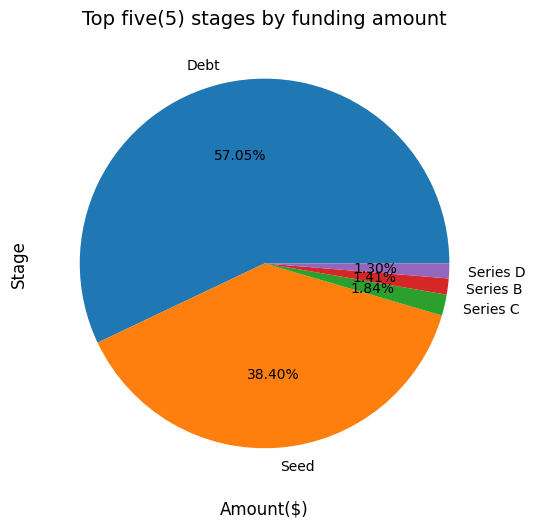

In [115]:
#Group data by Headquarter and amount 
Top_stages= merged_data.groupby('Stage')['Amount($)'].sum().reset_index()
#sort data in ascending order
Top_stages= Top_stages.sort_values('Amount($)', ascending=False)

# Convert the 'Amount($)' column to standard numeric format
pd.options.display.float_format = '${:,.2f}'.format
#Print the top 10 results of the above cod
print(Top_stages.head(5))
# create chart using Seaborn
plt.figure(figsize=(10, 6))
plt.pie(x="Amount($)",labels='Stage', autopct='%.2f%%', data=Top_stages.head(5))

# set plot title and axis labels
plt.title("Top five(5) stages by funding amount", fontsize=14)
plt.xlabel("Amount($)", fontsize=12)
plt.ylabel("Stage", fontsize=12)

OBSERVATIONS 
The business owners would have to get more knowledge and understanding of the funding environment at several phases of growth in the ever-changing world of startup investing. Strategic fundraising inputs are guided by the important insights this study provides regarding financing quantities at various investment stages.

The above pie chart dipicts more on the funding amount across top 5 investment stages. it can be analysed that the debt stage gain a impressive 57.05% of the funding amount.The seed stage also recieved 38.40% of the funding amount.Series B, Series C and Series D had the lowest funding amount gaining 1.41%, 1.84% and 1.30% respectively.

RECOMMENDATIONS
Considered the funding trends at each growing stage, entrepreneurs can carefully strategised their fundraising initiatives, matching funding requirements with investors' preferences. This awareness creation can go a long way to help startups enhance their growing parterns and improve the abilities of the business owners by obtaining an important financial backing to competite in the business environment.

QUESTION 4
ARE THEY TOP INVESTORS IN THE INDIAN STARTUP AND HOW MUCH WAS PROVIDED BY EACH OF THEM?

                                               Investor           Amount($)
1595                                        Unavailable $155,909,043,500.00
1376           Silver Lake, Mubadala Investment Company  $70,000,000,000.00
1289    Salesforce Ventures, Dragoneer Investment Group   $3,000,000,000.00
497                  Facebook, Google, KKR, Silver Lake   $2,200,000,000.00
1527                                       Tiger Global   $1,417,000,000.00
1094              Owl Ventures, Tiger Global Management   $1,200,000,000.00
358   Canaan Valley Capital, Glade Brook Capital Par...   $1,000,000,000.00
504   Falcon Edge, DST Global, D1 Capital, Redbird C...     $840,000,000.00
554           General Atlantic, Kohlberg Kravis Roberts     $800,000,000.00
366                      Carmignac, Falcon Edge Capital     $800,000,000.00


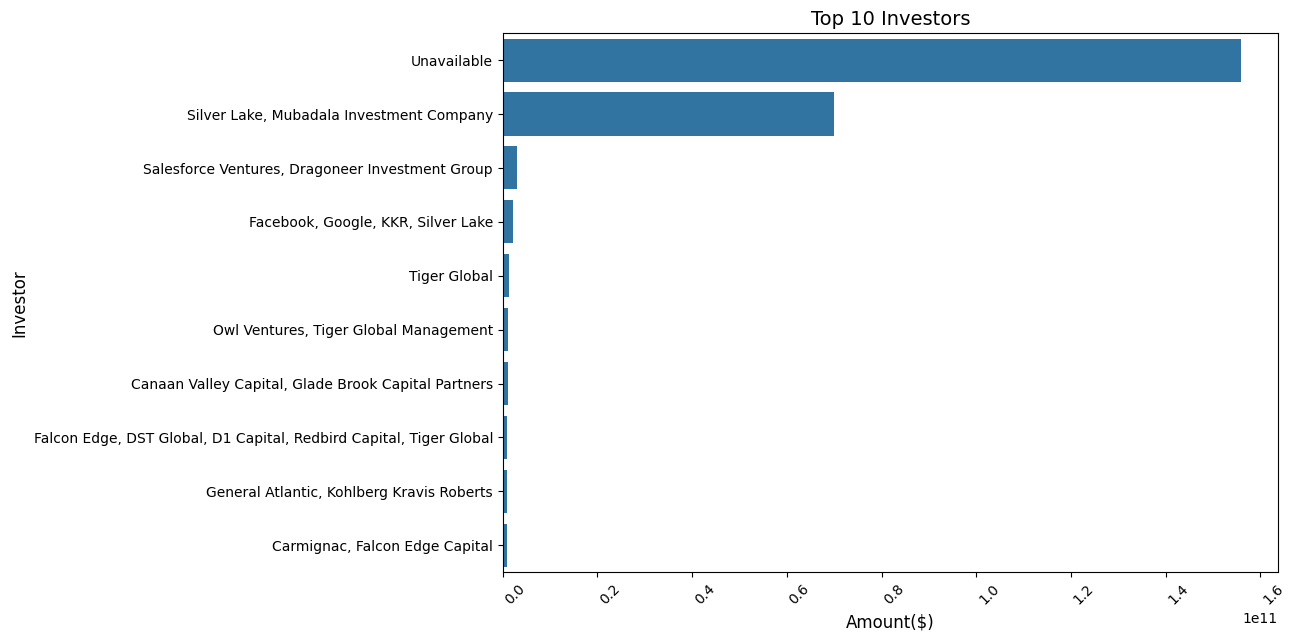

In [117]:
#Group data by Headquarter and amount 
Top_investors= merged_data.groupby('Investor')['Amount($)'].sum().reset_index()
#sort data in ascending order
Top_investors= Top_investors.sort_values('Amount($)', ascending=False)

# Convert the 'Amount($)' column to standard numeric format
pd.options.display.float_format = '${:,.2f}'.format
#Print the top 10 results of the above cod
print(Top_investors.head(10))
#Create a barplot using seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='Amount($)', y='Investor',data=Top_investors.head(10))


# set plot title and axis labels
plt.title("Top 10 Investors", fontsize=14)
plt.xlabel("Amount($)", fontsize=12)
plt.ylabel("Investor", fontsize=12)
plt.xticks(rotation=45, ha='left')
plt.show()

OBSERVATIONS
The above chart clearly show that, the companies who decided not to reveal their investors were categorized as "unavailable" was leading the chart as a higher contributor with a significant funding of 151.34billion in the chart above.

RECOMENDATIONS
 Some companies decided not to disclose their investors, though they have a significant contributions which cannot be disputed, shaping the future of innovation and entrepreneurship in the always changing startup environment. The deeper view into the investor landscape provides an insightful information about the funding dynamics that improve the growth of startups in the indian ecosystem.


QUESTION 5.
HOW THE LOCATIONS THAT RECEIVED THE MOST FUNDING PERFORM,CONSIDERED THE TOP 10 LOCATIONS

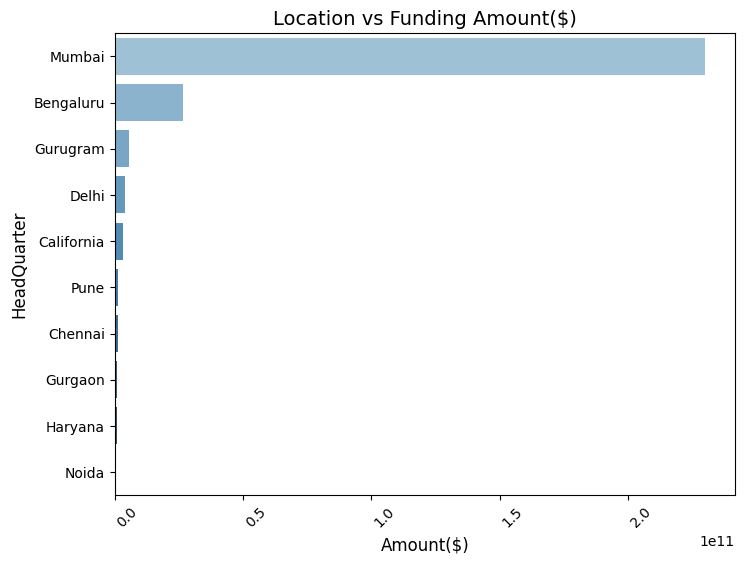

In [118]:
#Group data by Headquarter and amount 
location_funding= merged_data.groupby('HeadQuarter')['Amount($)'].sum().reset_index()
#sort data in ascending order
location_funding= location_funding.sort_values('Amount($)', ascending=False)

# Convert the 'Amount($)' column to standard numeric format
pd.options.display.float_format = '${:,.2f}'.format
#Print the top 10 results of the above cod
#print(location_funding.head(10))
# create barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="Amount($)", y="HeadQuarter", palette="Blues_d", data=location_funding.head(10))

# set plot title and axis labels
plt.title("Location vs Funding Amount($)", fontsize=14)
plt.xlabel("Amount($)", fontsize=12)
plt.ylabel("HeadQuarter", fontsize=12)
plt.xticks(rotation=45, ha='left')

# show the plot
plt.show()

OBSERVATIONS
The visualisation chart above clearly shows that,in Mumbai city,the startups received the most funding suming up to 230,065,658,494.00.Additinally, Bengaluru came second on the list of a total funding of 26,658,801,014.00. finally the startups in Delhi and Gurugram as well received  the significant startup funding of 4,065,653,185.00 and 5,610,231,500.00 respectively.